In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("data.csv")

In [3]:
len(df)

11914

In [4]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [6]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [7]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [8]:
df.dtypes[df.dtypes == 'object']  # left is index, right is value

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [9]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [10]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(" ", "_")

In [11]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


# 2.3 Exploratory Data Analysis

In [12]:
import matplotlib.pyplot as plt
import seaborn as sb

In [180]:
for col in df.columns:
    print(col)
    print(df[col].nunique())
    print(df[col].unique()[:5])
    print()

make
48
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']

model
914
['1_series_m' '1_series' '100' '124_spider' '190-class']

year
28
[2011 2012 2013 1992 1993]

engine_fuel_type
10
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']

engine_hp
356
[335. 300. 230. 320. 172.]

engine_cylinders
9
[ 6.  4.  5.  8. 12.]

transmission_type
5
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']

driven_wheels
4
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']

number_of_doors
3
[ 2.  4.  3. nan]

market_category
71
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']

vehicle_size
3
['compact' 'midsize' 'large']

vehicle_style
16
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']

highway_mpg
59
[26 28 27 25 24]

city_mpg
69
[19 20 18 17 16]

popularity
48
[3916 3105  819  617 1013]

msrp
6049
[46135 40650 36350 2945

<Axes: xlabel='msrp', ylabel='Count'>

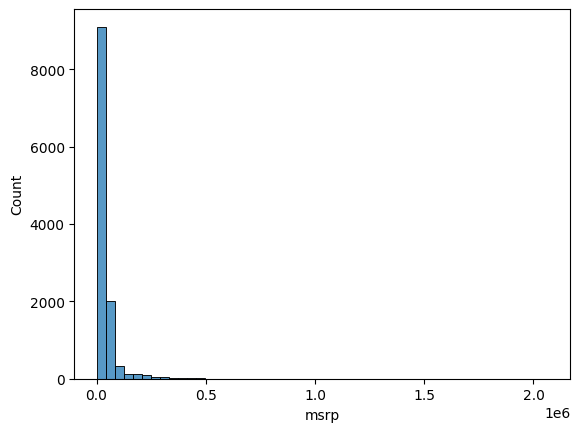

In [182]:
sb.histplot(df.msrp, bins=50)  # bins means how many bars in horizon

# 1e6 = 10 ** 6, 1 million
# This data is Long TAIL, most of data in left, but there are some values have huge values

<Axes: xlabel='msrp', ylabel='Count'>

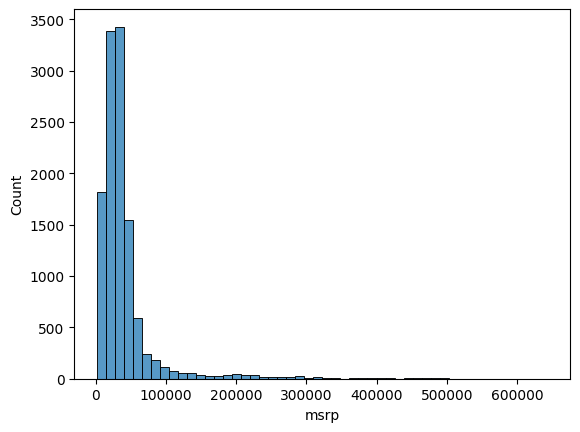

In [183]:
sb.histplot(df.msrp[df.msrp < 1000000], bins=50)

In [184]:
# these long tail is not useful... so get rid of it!
# To do this, let's apply logarithm to price! after that, we can get compact values..

In [185]:
np.log([0, 1, 10, 100, 1000, 100000])  # log of big number is not really big

/var/folders/6g/txmf0w9537n2yz58hrhtwhkh0000gn/T/ipykernel_6611/662271713.py:1: RuntimeWarning: divide by zero encountered in log
  np.log([0, 1, 10, 100, 1000, 100000])  # log of big number is not really big


array([       -inf,  0.        ,  2.30258509,  4.60517019,  6.90775528,
       11.51292546])

In [186]:
np.log([0+1, 1+1, 10+1, 100+1, 1000+1, 100000+1])

array([ 0.        ,  0.69314718,  2.39789527,  4.61512052,  6.90875478,
       11.51293546])

In [187]:
np.log1p([0, 1, 10, 100, 1000, 100000]) # same result of previous one

array([ 0.        ,  0.69314718,  2.39789527,  4.61512052,  6.90875478,
       11.51293546])

In [13]:
price_logs = np.log1p(df.msrp)

<Axes: xlabel='msrp', ylabel='Count'>

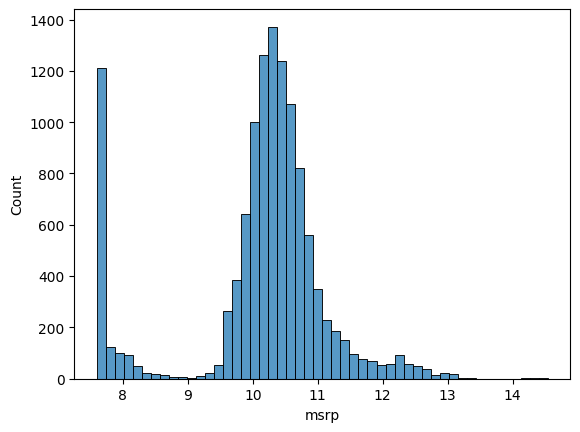

In [14]:
sb.histplot(price_logs, bins=50) # normal distribution

In [15]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


# Setting Up The Validation Framework

In [16]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = int(n * 0.6)

In [17]:
n, n_val + n_test + n_train  # numbers are not equal!

(11914, 11912)

In [18]:
n_train = n - (n_val + n_test)

In [19]:
n, n_val + n_test + n_train # same now!

(11914, 11914)

In [20]:
n_val, n_test, n_train

(2382, 2382, 7150)

In [21]:
df.iloc[:10]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
5,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,31200
6,bmw,1_series,2012,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,26,17,3916,44100
7,bmw,1_series,2012,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,39300
8,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,36900
9,bmw,1_series,2013,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,27,18,3916,37200


In [22]:
df_val = df.iloc[:n_val]
df_test = df.iloc[n_val:n_val+n_test]
df_train = df.iloc[n_val+n_test:]

In [23]:
df_val

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,porsche,cayenne,2016,premium_unleaded_(required),570.0,8.0,automatic,all_wheel_drive,4.0,"crossover,luxury,high-performance",midsize,4dr_suv,21,14,1715,157300
2378,porsche,cayenne,2016,diesel,240.0,6.0,automatic,all_wheel_drive,4.0,"crossover,luxury,diesel",midsize,4dr_suv,29,20,1715,62300
2379,porsche,cayenne,2017,premium_unleaded_(required),520.0,8.0,automatic,all_wheel_drive,4.0,"crossover,luxury,performance",midsize,4dr_suv,21,14,1715,116500
2380,porsche,cayenne,2017,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,luxury",midsize,4dr_suv,24,18,1715,59600


In [199]:
# all BMW are in validation dataset, we have to shuffle it!

In [25]:
idx = np.arange(n)

In [26]:
np.random.shuffle(idx)

In [27]:
idx[n_train:]

array([ 4169,  9236,  3476, ..., 10456,   723, 10777])

In [33]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [34]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [205]:
# new problem : different result! -> make it reproducible!

In [35]:
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)

In [36]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [37]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [135]:
# test again : same computer, same result
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]
df_train.head(5)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [39]:
len(df_val), len(df_test), len(df_train)

(2382, 2382, 7150)

In [40]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [136]:
# drop index
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)

In [137]:
# set log
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)
y_train = np.log1p(df_train.msrp.values)

In [138]:
# # remove data not to use it accidently
del df_val['msrp']
del df_test['msrp']
del df_train['msrp']

# Linear Regression

In [44]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [45]:
# engine hp, city mpg, popularity to feature matrix
# xi = [155, 29, 586]
xi = [df_train.iloc[10]['engine_hp'], df_train.iloc[10]['city_mpg'], df_train.iloc[10]['popularity']]

In [46]:
w0 = 0
w = [0.01, 0.04, 0.002]

In [47]:
def linear_regression(xi):
    n = len(xi)
    pred = w0
    for j in range(n):
        pred = pred + w[j] * xi[j]
    return pred

In [48]:
linear_regression(xi)

5.142

In [49]:
np.expm1(3.8819999999999997) # undo logarithm -> do exponent!

47.52116041451591

# Linear Regression Vector

In [221]:
def dot(xi, w):
    n = len(xi)
    res = 0.0

    for j in range(n):
        res += xi[j] * w[j]

    return res

In [222]:
def linear_regression(xi):
    # n = len(xi)
    # pred = w0
    # for j in range(n):
    #     pred = pred + w[j] * xi[j]
    # return pred
    return w0 + dot(xi, w)

In [223]:
# first x(x0) is always 1: w0 * 1 + w[j] * xi[j]

In [224]:
w_new = [w0] + w

In [225]:
w_new

[0, 0.01, 0.04, 0.002]

In [50]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [51]:
linear_regression(xi)

NameError: name 'dot' is not defined

In [57]:
xi = [155, 29, 586]
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

In [58]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [59]:
def linear_regression(X):
    return X.dot(w_new)

In [60]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

# Training Linear Regression

In [232]:
def train_linear_regression(X, y):
    pass

In [61]:
X = [
        [148,  24, 1385],
        [132,  25, 2031],
        [453,  11, 86],
        [158,  24, 1385],
        [172,  25, 201],
        [413,  11, 86],
        [38,  54, 185],
        [142,  25, 431],
        [453,  31, 86],
]
X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24, 1385],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [62]:
ones = np.ones(X.shape[0])

In [63]:
X = np.column_stack([ones, X]).round() # add 1 to front of this matrix

In [64]:
y = [10000, 20000, 15000, 25000, 10000, 20000, 15000, 25000, 12000]

In [65]:
XTX = X.T.dot(X) # gram matrix

In [66]:
XTX_inv = np.linalg.inv(XTX)

In [67]:
XTX.dot(XTX_inv).round(1) # actually, it is not really identity matrix, but the values are really tiny,,

array([[ 1.,  0.,  0., -0.],
       [ 0.,  1., -0., -0.],
       [ 0.,  0.,  1., -0.],
       [ 0.,  0.,  0.,  1.]])

In [68]:
w_full = XTX_inv.dot(X.T).dot(y)

In [69]:
w0 = w_full[0] # bias
w = w_full[1:]

In [70]:
w0, w

(24360.407560885404, array([ -13.5150727 , -183.80348802,    0.60150145]))

In [71]:
X = [
        [148,  24, 1385],
        [132,  25, 2031],
        [453,  11, 86],
        [158,  24, 1385],
        [172,  25, 201],
        [413,  11, 86],
        [38,  54, 185],
        [142,  25, 431],
        [453,  31, 86],
]
X = np.array(X)

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X]).round()
    XTX = X.T.dot(X) # gram matrix
    XTX_inv = np.linalg.inv(XTX)
    XTX.dot(XTX_inv).round(1)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:] # bias, weights

In [72]:
train_linear_regression(X, y)

(24360.407560885404, array([ -13.5150727 , -183.80348802,    0.60150145]))

# Baseline Model for Car Price Prediction Project

In [73]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86


In [74]:
df_train.dtypes
# we will use these features: engine_hp, engine_cylinders, highway_mpg, city_mpg, popularity

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [75]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
df_train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657
...,...,...,...,...,...
7145,300.0,6.0,31,20,3916
7146,210.0,4.0,30,24,873
7147,285.0,6.0,22,17,549
7148,563.0,12.0,21,13,86


In [76]:
X_train = df_train[base].values

In [77]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])

In [78]:
train_linear_regression(X_train, y_train) # result: (nan, array([nan, nan, nan, nan, nan])) -> missing value!

(nan, array([nan, nan, nan, nan, nan]))

In [79]:
df_train[base].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [80]:
df_train[base].fillna(0).isnull().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [81]:
X_train = df_train[base].fillna(0).values
w0, w = train_linear_regression(X_train, y_train)

In [82]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

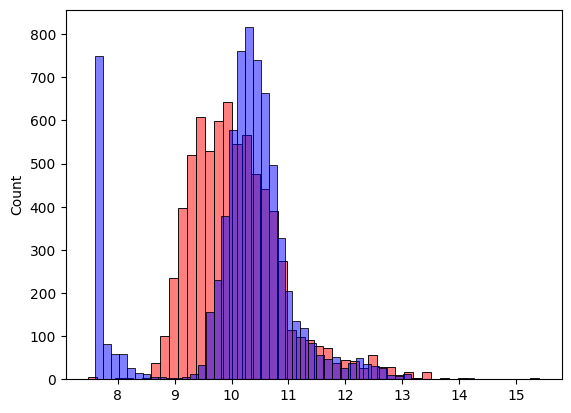

In [83]:
sb.histplot(y_pred, color='red', alpha=0.5, bins=50) # prediction
sb.histplot(y_train, color='blue', alpha=0.5, bins=50) # target value

In [84]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [85]:
rmse(y_train, y_pred) # first value is real value, - 0.7415514275559719

0.7554192603920132

# 2.10 - Computing RMSE on Validation Data

In [258]:
# base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
# X_train = df_train[base].fillna(0).values
# w0, w = train_linear_regression(X_train, y_train)
# y_pred = w0 + X_train.dot(w)

In [86]:
def prepare_X(df):
    df_num = df[base].fillna(0)
    X = df_num.values
    return X

In [87]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.7616530991301608

# Simple Feature Engineering

In [261]:
# df_train.year.max() = 2017
2017 - df_train.year # use this for one of the feature of our model

0        2
1        0
2        0
3        1
4        1
        ..
4759    19
4760     3
4761    11
4762     1
4763     2
Name: year, Length: 4764, dtype: int64

In [88]:
def prepare_X(df):
    df = df.copy() # not to change original dataframe
    df['age'] = 2017 - df.year
    features = base.copy() + ['age']
    df_num = df[features].fillna(0)
    X = df_num.values
    return X


In [89]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [90]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5172055461058325

<Axes: ylabel='Count'>

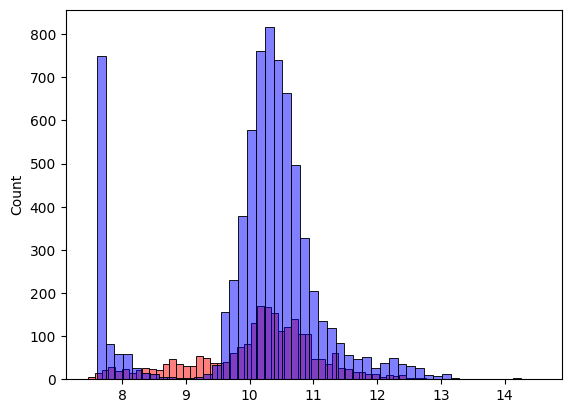

In [91]:
sb.histplot(y_pred, color='red', alpha=0.5, bins=50) # prediction
sb.histplot(y_train, color='blue', alpha=0.5, bins=50) # target value

# Categorical Variables

In [113]:
# df_train.dtypes
(df_train.number_of_doors == 2).astype('int')

0       1
1       0
2       0
3       0
4       0
       ..
7145    1
7146    1
7147    0
7148    0
7149    0
Name: number_of_doors, Length: 7150, dtype: int64

In [93]:
'num_doors_%s' % 2

'num_doors_2'

In [127]:
def prepare_X(df):
    df = df.copy() # not to change original dataframe
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
    
    df_num = df[features]
    print(features)
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [128]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity', 'age', 'num_doors_2', 'num_doors_3', 'num_doors_4']
['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity', 'age', 'num_doors_2', 'num_doors_3', 'num_doors_4']


0.5157995641502287

In [129]:
makes = list(df.make.value_counts().head().index)

In [130]:
def prepare_X(df):
    df = df.copy() # not to change original dataframe
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)

    for make in makes:
        df[f'make_{make}'] = (df.make == make).astype('int')
        features.append(f'make_{make}')
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [141]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

LinAlgError: Singular matrix

In [132]:
# df_train.dtypes
category_variables = [
    'make', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'
]
categories = {}
for c in category_variables:
    categories[c] = list(df[c].value_counts().head().index)

In [142]:
def prepare_X(df):
    df = df.copy() # not to change original dataframe
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
    
    for c, values in categories.items():
        for val in values:
            df['%s_%s' % (c, val)] = (df[c] == val).astype('int')
            features.append('%s_%s' % (c, val))
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [143]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

45.010195745328936

# Regularization

In [144]:
# if no inverse for XTX, then controll the weight
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X]).round()
    XTX = X.T.dot(X) # gram matrix
    XTX = XTX + r*np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    XTX.dot(XTX_inv).round(1)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:] # bias, weights

In [145]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, 0.01)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.45652199013684397

# Tuning Model

In [146]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r)
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    print(r, w0, score)

0.0 261743196642692.66 45.010195745328936
1e-05 7.367752436742351 0.4565170019770594
0.0001 6.292884445680863 0.4565170645396656
0.001 6.285793168949329 0.45651750849222206
0.1 6.191208695625747 0.45656927629995653
1 5.634896668567931 0.4572204317993856
10 4.283980108961798 0.470145693210008


In [147]:
r = 0.00001
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)

# Using Model

In [148]:
df_full_train = pd.concat([df_train, df_val])

In [149]:
df_full_train = df_full_train.reset_index(drop=True)

In [150]:
X_full_train = prepare_X(df_full_train)

In [151]:
X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]])

In [152]:
y_full_train = np.concatenate([y_train, y_val])

In [153]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r)

In [155]:
w

array([ 1.52501365e-03,  1.18183719e-01, -6.66280102e-03, -5.33589206e-03,
       -4.87602279e-05, -9.69102302e-02, -7.94265740e-01, -8.92521219e-01,
       -6.36745745e-01, -4.14319007e-02,  1.75561361e-01, -5.82156733e-04,
       -1.00561844e-01, -9.27560140e-02, -4.66927005e-01,  7.98012613e-02,
       -3.16115956e-01, -5.52050186e-01, -7.89989458e-02,  1.29742509e+01,
        1.27989422e+01,  1.30285241e+01,  1.45317327e+01,  1.23888966e+01,
       -2.61215822e-02, -1.25423826e-01, -3.82515259e-02, -1.10252045e-01,
       -9.70586934e-02,  3.73032433e-02, -5.81757398e-02, -2.35907768e-02,
       -1.19293419e-02,  2.18927421e+00,  2.07490363e+00,  2.05948356e+00,
       -5.00782183e-02,  5.62147572e-02,  1.84795563e-01,  3.32645385e-01,
       -1.58805558e-01])

In [157]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.4517744805585277

In [159]:
car = df_test.iloc[20].to_dict()

In [161]:
df_small = pd.DataFrame([car])
x_small = prepare_X(df_small)
y_pred = (w0 + x_small.dot(w))[0]
np.expm1(y_pred)

34983.548238291536

In [162]:
np.expm1(y_test[20])

35000.00000000001